# Title : Unveiling the Android App Market : Analyzing Google Play Store Data

- Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1 Load Both Datasets

In [2]:
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")


In [3]:
apps.head()
reviews.head()
apps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


# 2 Data Cleaning 

- 1 Remove duplicates

In [4]:
apps.drop_duplicates(inplace=True)


- 2 Fix Rating column

In [5]:
apps = apps[apps['Rating'] <= 5]


# 3 Clean Price column

In [6]:
apps['Price'] = apps['Price'].str.replace('$', '')
apps['Price'] = apps['Price'].astype(float)


# 4 Clean Installs columns

In [7]:
apps['Installs'] = apps['Installs'].str.replace('+', '')
apps['Installs'] = apps['Installs'].str.replace(',', '')
apps['Installs'] = apps['Installs'].astype(int)


# 5 Clean size columns

In [9]:
apps['Size'] = apps['Size'].astype(str)

apps['Size'] = apps['Size'].str.replace('M', '')
apps['Size'] = apps['Size'].str.replace('k', '')
apps['Size'] = apps['Size'].replace('Varies with device', np.nan)

apps['Size'] = apps['Size'].astype(float)


- 3 Category Analysis

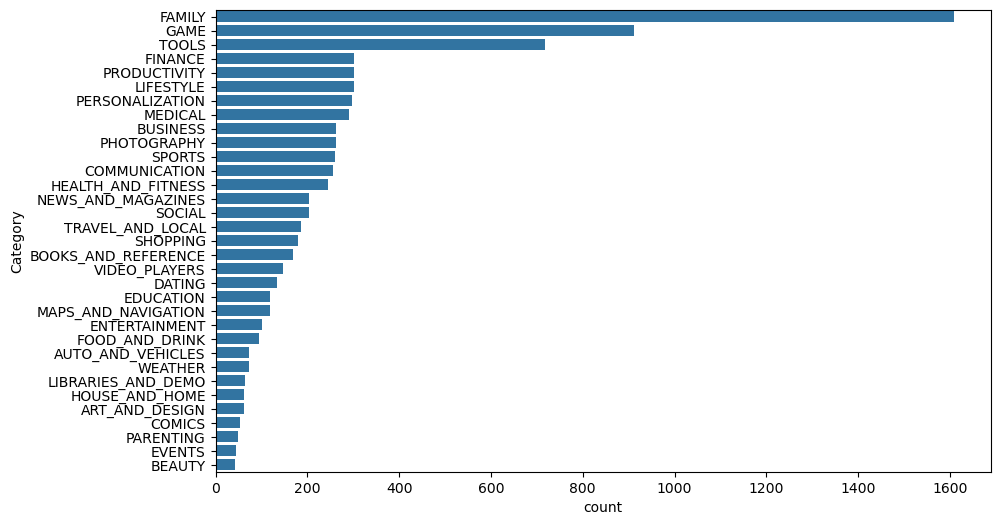

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(y='Category', data=apps,
              order=apps['Category'].value_counts().index)
plt.show()


- 4 Rating Analysis

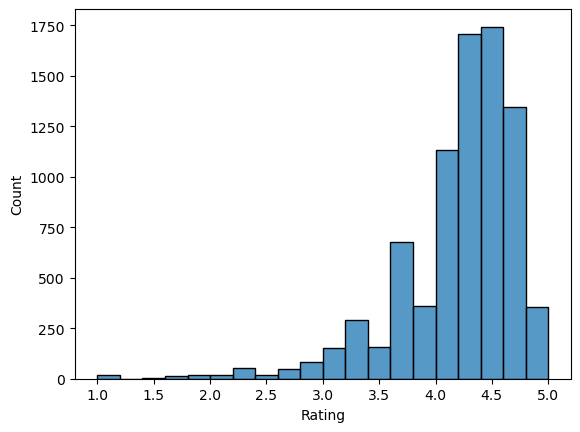

In [11]:
sns.histplot(apps['Rating'], bins=20)
plt.show()


- 5 Free vs Paid Apps

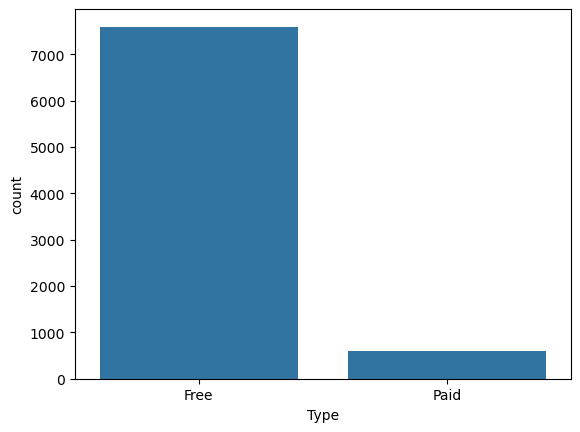

In [12]:
sns.countplot(x='Type', data=apps)
plt.show()


# 6 Rating vs Installs

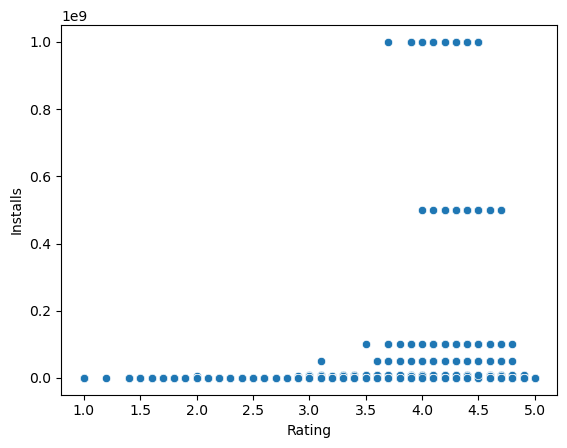

In [13]:
sns.scatterplot(x='Rating', y='Installs', data=apps)
plt.show()


# 7 Sentiment Analysis

In [14]:
from textblob import TextBlob

reviews['Sentiment_Score'] = reviews['Translated_Review'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)

reviews['Sentiment_Type'] = reviews['Sentiment_Score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)


- Plot

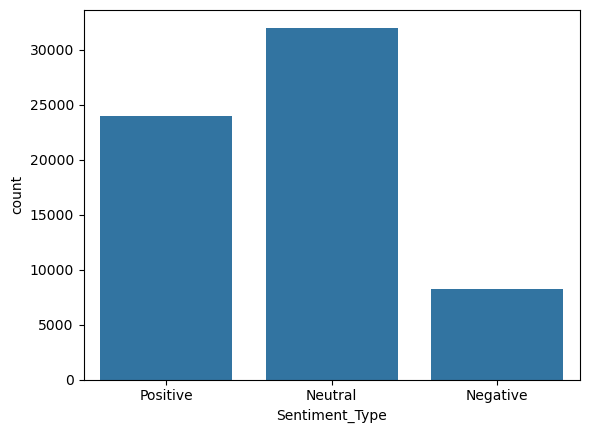

In [15]:
sns.countplot(x='Sentiment_Type', data=reviews)
plt.show()


# 8 Interpretation:

In this project, the Google Play Store dataset was analyzed to understand app market dynamics, category distribution, pricing trends, ratings, installs, and user sentiment.

After cleaning and preprocessing the data, several insights were obtained:

The Family and Game categories contain the highest number of applications, indicating strong demand in entertainment and family-oriented apps.

The majority of applications on the Play Store are free, supporting a freemium business model.

Most apps have ratings between 4.0 and 4.5, suggesting generally positive user satisfaction.

Apps with higher ratings tend to have higher installation counts, indicating that user satisfaction influences popularity.

Paid applications are fewer in number and are typically concentrated in specific niche categories.

Sentiment analysis of user reviews shows that most reviews are positive, reflecting overall favorable user experiences.

Overall, this project demonstrates strong data cleaning, exploratory data analysis, visualization, and sentiment analysis skills. The insights derived from this analysis provide a deeper understanding of market trends and user behavior in the Android app ecosystem.

